#### K-nearest neighbors classifier

K-nearest neighbors (kNN) is a simple, instance-based machine learning algorithm used for classification (and regression) tasks. It operates based on the principle that similar data points are located close to each other in the (feature) space.

* Training: kNN does not explicitly learn a model; instead, it memorizes training dataset.
   
* Prediction: to make a prediction for a new data point, k-NN identifies `k closest points` in the training dataset (neighbors) using a distance metric (commonly Euclidean distance).

* The class or value of the new data point is determined based on the majority class (for classification) or average (for regression) of these neighbors.

We use `NumPy` to create a kNN classifier, and compare it to ML package sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

[2 3 0 2 3 2 3 0 2 1]


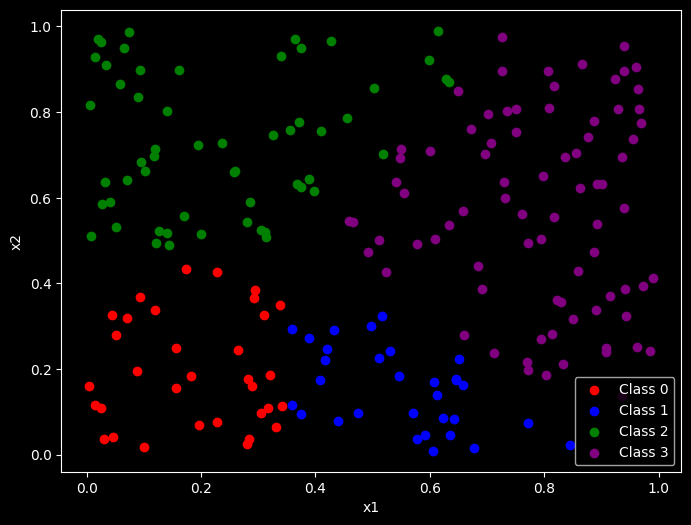

In [ ]:
np.random.seed(42)
n_pts = 200
n_dim = 2
k = 9

# Data points
x = np.random.random((n_pts, n_dim))
# x_test = np.random.random((1, n_dim))
x_test = np.array([[0.4, 0.42]])

# Manually assign points to 4 clusters
centers = np.array([[0.2, 0.2], [0.5, 0.2], [0.2, 0.7], [0.7, 0.4]])

# Broadcsting to find differences between points and centers
# This makes center shape (1, 4, n_dim)
# Output is (n_pts, 4, n_dim)
# Where [i, j, :] is difference between ith data points and jth center
# Then we find the smallest distances to assign label to each points
labels = np.argmin(np.sum((x.reshape(n_pts, 1, n_dim) - centers)**2, axis=2), axis=1)
print(labels[:10])

# Visualize data points with assigned cluster labels
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple']
for i in range(4):
    plt.scatter(x[labels == i, 0], x[labels == i, 1], c=colors[i], label=f'Class {i}')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [ ]:
# Broadcsting to find difference between x_test and all points
# This makes x shape (1, n_pts, n_dim)
# Output is (1, n_pts, n_dim)
# Where [0, i, :] is difference between x_test and ith data points
diff = x_test.reshape(1, 1, n_dim) - x
print(diff.shape)

(1, 200, 2)


In [ ]:
# Aggregate to find pairwise distances
# This matrix is symmetric
dist = np.sum(diff**2, axis=2)

print(dist.shape)

(1, 200)


In [ ]:
nearest_idx = np.argsort(dist[0])[:k]
nearest_classes = labels[nearest_idx][:k]

print(f'Nearest neighbour using NumPy: \n{nearest_idx}')
print(f'Nearest class using NumPy: \n{nearest_classes}')

final_class = np.bincount(nearest_classes).argmax()
print(f'Final using NumPy: \n{final_class}')

# We check whether we are doing correctly using sklearn
knn = NearestNeighbors()
knn.fit(x)
d, idx = knn.kneighbors(x_test, n_neighbors=k)
# print(idx.shape)
print(f'Nearest neighbour using sklearn: \n{idx}')

knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x, labels)
predicted_class = knn_classifier.predict(x_test)
print(f'Final using sklearn: \n{predicted_class}')

Nearest neighbour using NumPy: 
[ 97 170 125  11  48  51  42   9 134]
Nearest class using NumPy: 
[0 3 0 0 3 2 0 1 1]
Final using NumPy: 
0
Nearest neighbour using sklearn: 
[[ 97 170 125  11  48  51  42   9 134]]
Final using sklearn: 
[0]


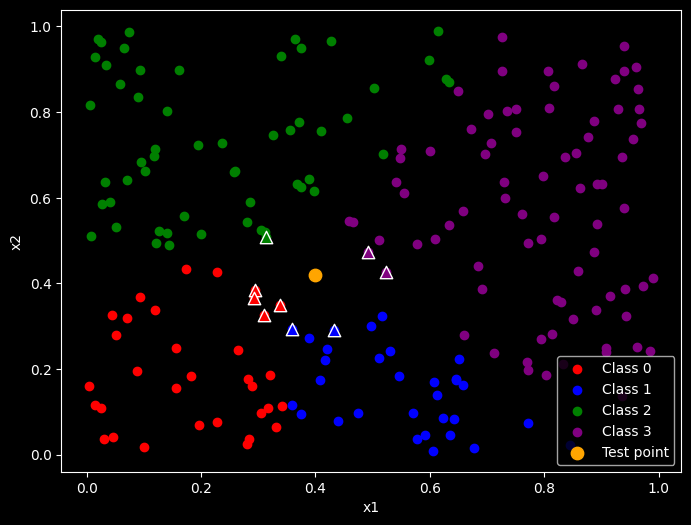

In [ ]:
# Plot data points with assigned cluster labels and test point
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.scatter(x[labels == i, 0], x[labels == i, 1], c=colors[i], label=f'Class {i}')

# Plot test point
plt.scatter(x_test[0, 0], x_test[0, 1], c='orange', marker='o', s=80, label='Test point', zorder=5)

# 5 nearest neighbors
for idx in nearest_idx[:k]:
    cluster_color = colors[labels[idx]]
    plt.scatter(x[idx, 0], x[idx, 1], c=cluster_color, marker='^', s=80, edgecolor='w')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()